In [1]:
'''age -   age in years
gender -  (1 = male; 0 = female)
cp     -  chest pain type
trestbps- resting blood pressure (in mm Hg on admission to the hospital)
chol   -  serum cholestoral in mg/dl
fbs    -  (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg-  resting electrocardiographic results
thalach-  maximum heart rate achieved
exang  -  exercise induced angina (1 = yes; 0 = no)
oldpeak-  ST depression induced by exercise relative to rest
slope  -  the slope of the peak exercise ST segment
ca     -  number of major vessels (0-3) colored by flourosopy
thal   -  3 = normal; 6 = fixed defect; 7 = reversable defect
target -  have disease or not (1=yes, 0=no)'''

'age -   age in years\ngender -  (1 = male; 0 = female)\ncp     -  chest pain type\ntrestbps- resting blood pressure (in mm Hg on admission to the hospital)\nchol   -  serum cholestoral in mg/dl\nfbs    -  (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\nrestecg-  resting electrocardiographic results\nthalach-  maximum heart rate achieved\nexang  -  exercise induced angina (1 = yes; 0 = no)\noldpeak-  ST depression induced by exercise relative to rest\nslope  -  the slope of the peak exercise ST segment\nca     -  number of major vessels (0-3) colored by flourosopy\nthal   -  3 = normal; 6 = fixed defect; 7 = reversable defect\ntarget -  have disease or not (1=yes, 0=no)'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
import seaborn as sns
#import random

In [116]:
data = pd.read_csv("heart.csv")
data.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.corr()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


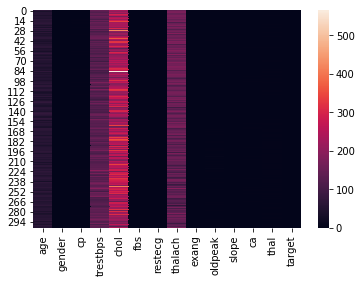

In [7]:
sns.heatmap(data)

In [8]:
data.cov()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.484558,-0.416661,-0.643499,44.495902,100.585076,0.392433,-0.555013,-82.903318,0.413022,2.214583,-0.944791,2.566356,0.378139,-1.021343
gender,-0.416661,0.217166,-0.023736,-0.463970,-4.780309,0.007475,-0.014261,-0.469871,0.031014,0.051993,-0.008819,0.056357,0.059930,-0.065307
cp,-0.643499,-0.023736,1.065132,0.861714,-4.113774,0.034719,0.024108,6.991618,-0.191168,-0.178821,0.076137,-0.191080,-0.102201,0.223330
trestbps,44.495902,-0.463970,0.861714,307.586453,111.967215,1.109042,-1.052324,-18.759131,0.557111,3.934486,-1.312832,1.818373,0.668022,-1.267950
chol,100.585076,-4.780309,-4.113774,111.967215,2686.426748,0.245427,-4.116703,-11.800494,1.631991,3.246794,-0.128964,3.737252,3.135488,-2.203855
fbs,0.392433,0.007475,0.034719,1.109042,0.245427,0.126877,-0.015769,-0.069897,0.004295,0.002377,-0.013147,0.050259,-0.006983,-0.004983
restecg,-0.555013,-0.014261,0.024108,-1.052324,-4.116703,-0.015769,0.276528,0.531462,-0.017474,-0.035883,0.030151,-0.038741,-0.003858,0.035998
thalach,-82.903318,-0.469871,6.991618,-18.759131,-11.800494,-0.069897,0.531462,524.646406,-4.076290,-9.153518,5.459369,-4.993235,-1.352491,4.818766
exang,0.413022,0.031014,-0.191168,0.557111,1.631991,0.004295,-0.017474,-4.076290,0.220707,0.157216,-0.074618,0.055603,0.059472,-0.102354
oldpeak,2.214583,0.051993,-0.178821,3.934486,3.246794,0.002377,-0.035883,-9.153518,0.157216,1.348095,-0.413219,0.264396,0.149462,-0.249452


age


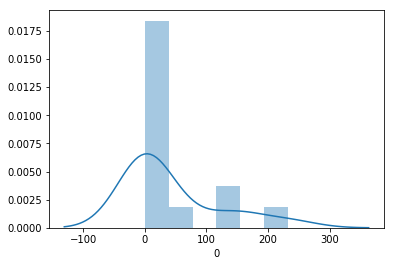

gender


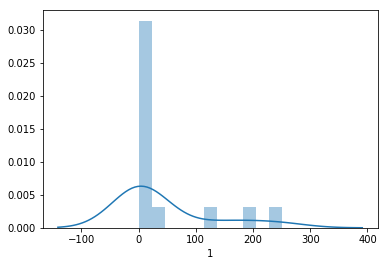

cp


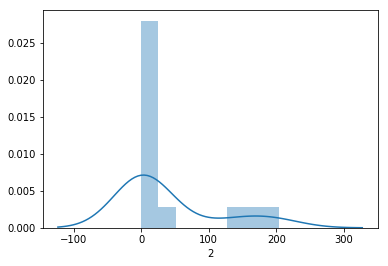

trestbps


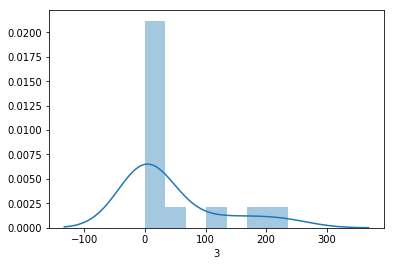

chol


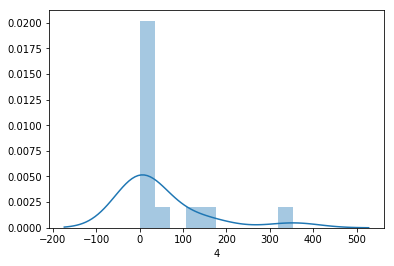

fbs


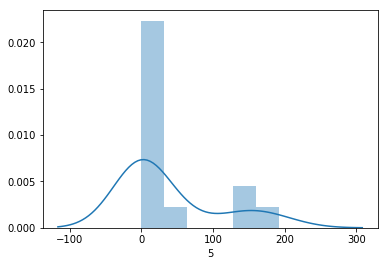

restecg


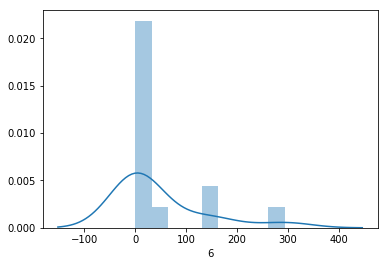

thalach


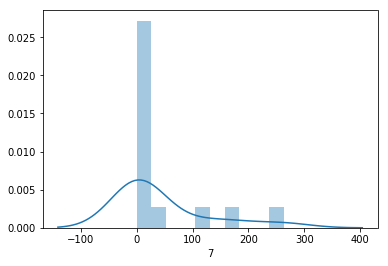

exang


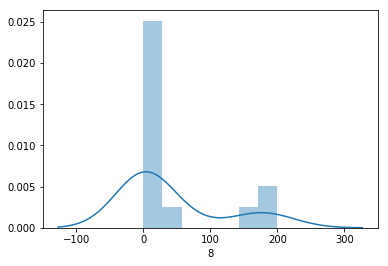

oldpeak


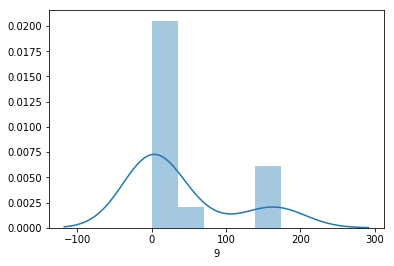

slope


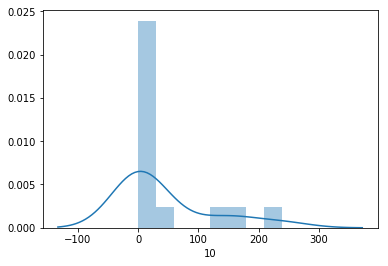

ca


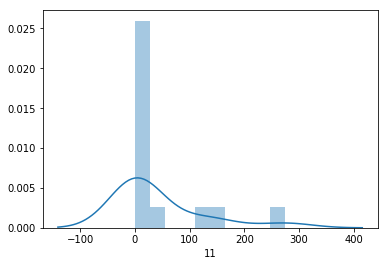

thal


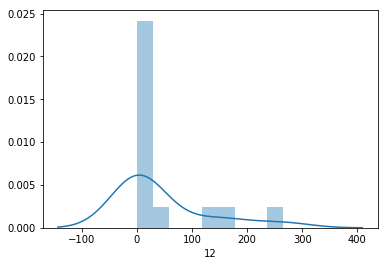

target


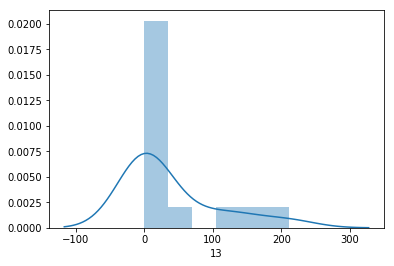

IndexError: index 14 is out of bounds for axis 0 with size 14

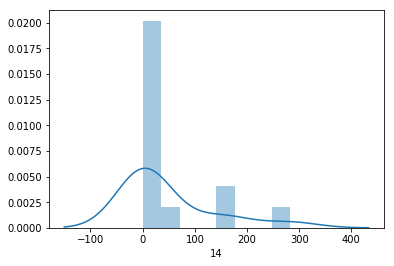

In [9]:
for i in range(len(data)-1):
    sns.distplot(data.iloc[i])
    print(data.columns[i])
    plt.show()

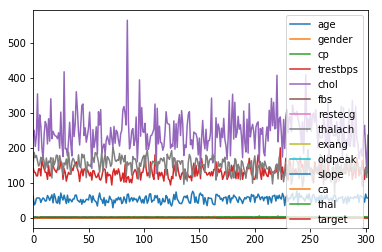

In [11]:
data.plot()

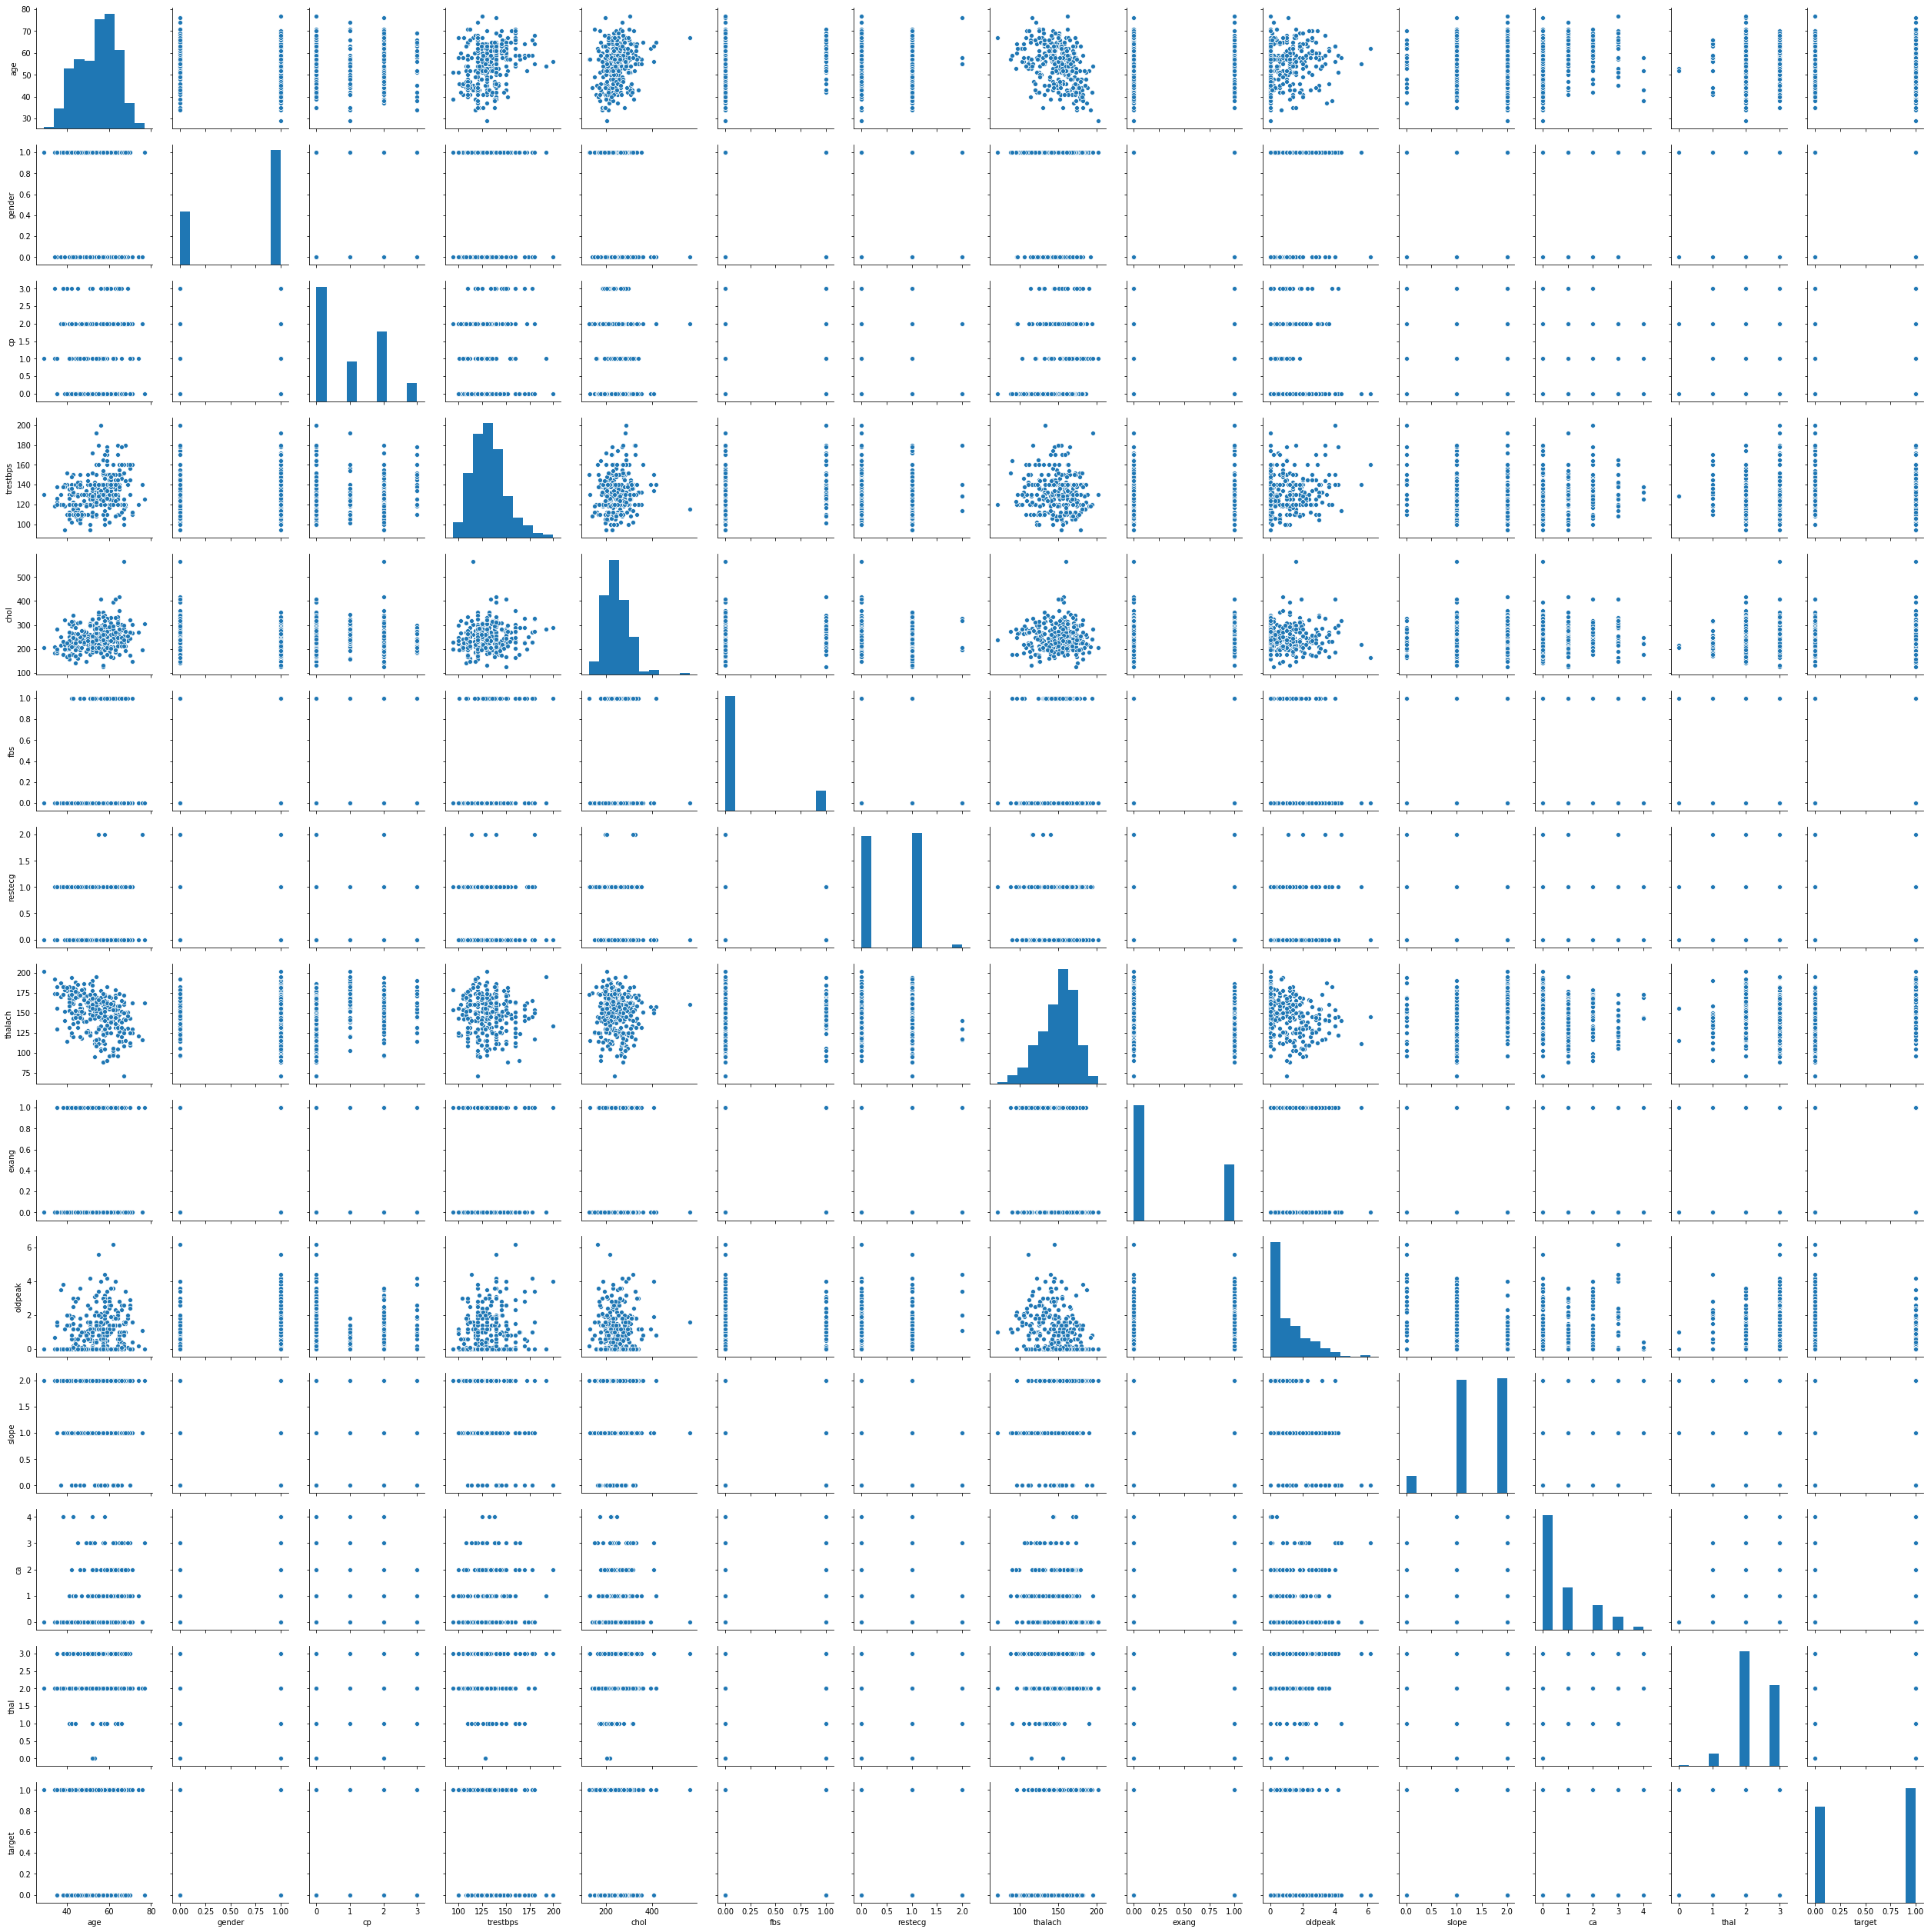

In [12]:
sns.pairplot(data)

In [13]:
mean_target = data['target'].mean()
mean_target

0.5445544554455446

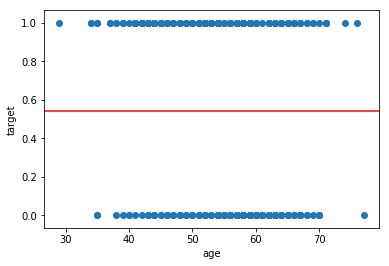

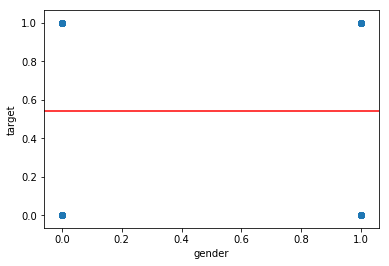

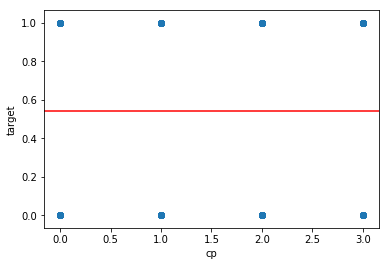

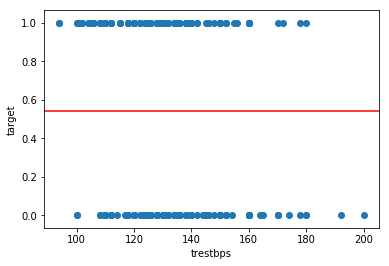

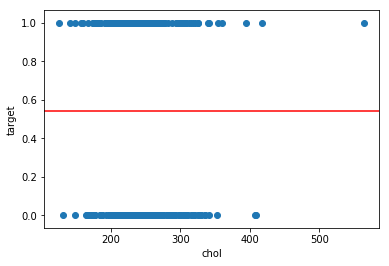

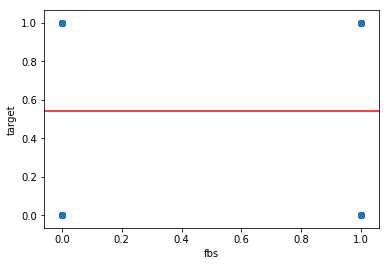

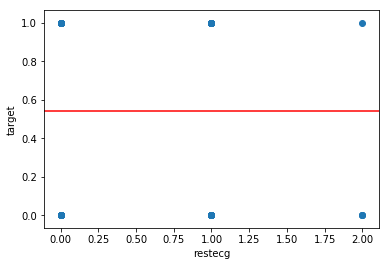

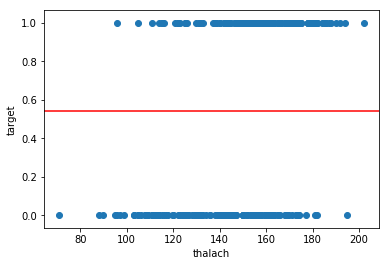

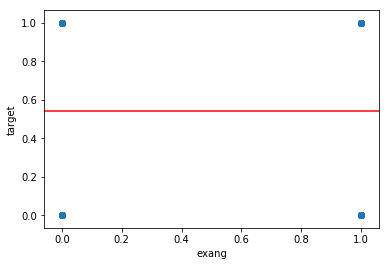

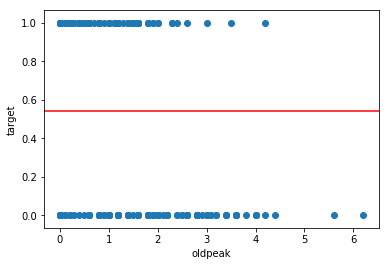

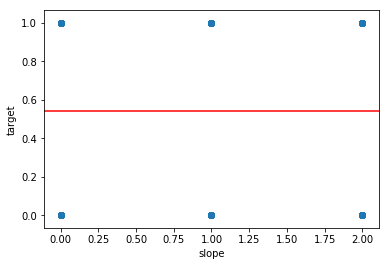

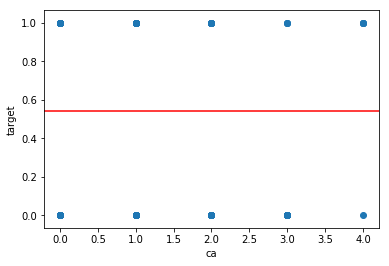

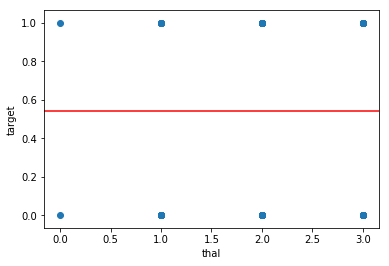

In [14]:
l = data.columns
for i in l[:-1]:
    #print(i)
    plt.scatter(data[i],data['target'])
    plt.xlabel(i)
    plt.ylabel('target')
    plt.axhline(mean_target,color='r')
    plt.show()

In [15]:
x = data.iloc[:,0:13]
y = data.iloc[:,13]

In [16]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [17]:
x.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4)

In [63]:
x_train

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2


In [64]:
x_test 

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3


In [65]:
y_train

255    0
28     1
216    0
236    0
116    1
      ..
1      1
101    1
266    0
106    1
129    1
Name: target, Length: 181, dtype: int64

In [66]:
y_test

169    0
231    0
294    0
289    0
117    1
      ..
84     1
176    0
191    0
112    1
286    0
Name: target, Length: 122, dtype: int64

# SVM


In [67]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability = True)
svc_classifier = svc.fit(x_train,y_train)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [68]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [69]:
from sklearn.model_selection import cross_val_score,cross_val_predict
svc_acc = cross_val_score(svc_classifier, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
svc_proba = cross_val_predict(svc_classifier, x_train_std, y_train, cv=3, method='predict_proba')
svc_scores = svc_proba[:, 1]

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

In [70]:
y_pred=svc_classifier.predict(x_test)

In [71]:
print("actual values:\n")
print(y_test.values)

actual values:

[0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0
 0 1 1 1 0 1 1 0 0 1 0]


In [72]:
print("predicted values:\n")
print(y_pred)

predicted values:

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [73]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 51.639344
Recall score : 100.000000
ROC score : 50.000000

[[ 0 59]
 [ 0 63]]


# KNN

In [74]:
from sklearn import neighbors

In [75]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
y_pred=clf.predict(x_test)

In [77]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0
 0 1 1 1 0 1 1 0 0 1 0]


In [78]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0
 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1]


In [79]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 62.295082
Recall score : 58.730159
ROC score : 62.415927

[[39 20]
 [26 37]]


In [80]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)
clf_acc = cross_val_score(clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
clf_proba = cross_val_predict(clf, x_train_std, y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1] 

# DECISION TREE

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
dtc_clf_acc = cross_val_score(dtc_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, x_train_std, y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]

In [83]:
y_pred=dtc_clf.predict(x_test)

In [84]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0
 0 1 1 1 0 1 1 0 0 1 0]


In [85]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0
 0 1 1 0 1 0 0 0 0 1 1]


In [86]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 73.770492
Recall score : 77.777778
ROC score : 73.634652

[[41 18]
 [14 49]]


In [87]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=5, random_state=0)
rmf_clf = rmf.fit(x_train, y_train)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [88]:
rmf_clf_acc = cross_val_score(rmf_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, x_train_std, y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]

In [89]:
y_pred=rmf_clf.predict(x_test)

In [90]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0
 0 1 1 1 0 1 1 0 0 1 0]


In [91]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1
 0 1 1 1 0 0 1 0 0 1 1]


In [92]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 77.868852
Recall score : 79.365079
ROC score : 77.818133

[[45 14]
 [13 50]]


In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_acc = cross_val_score(lr, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, x_train_std, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [94]:
y_pred=lr.predict(x_test)

In [95]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0
 0 1 1 1 0 1 1 0 0 1 0]


In [96]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0
 0 1 1 1 0 1 1 0 0 1 1]


In [97]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 84.426230
Recall score : 87.301587
ROC score : 84.328760

[[48 11]
 [ 8 55]]


 # Naive Bayes Classification

In [98]:
from sklearn.naive_bayes import GaussianNB
nb_classifier =GaussianNB()
nb_classifier.fit(x_train, y_train)
nb_acc = cross_val_score(nb_classifier, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
nb_proba = cross_val_predict(nb_classifier, x_train_std, y_train, cv=3, method='predict_proba')
nb_scores = nb_proba[:, 1]

In [99]:
y_pred=nb_classifier.predict(x_test)

In [100]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0
 0 1 1 1 0 1 1 0 0 1 0]


In [101]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 1]


In [102]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 81.147541
Recall score : 79.365079
ROC score : 81.207963

[[49 10]
 [13 50]]
